## Import Libraries and Load Data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

## Data Exploration and Correlation Heatmap

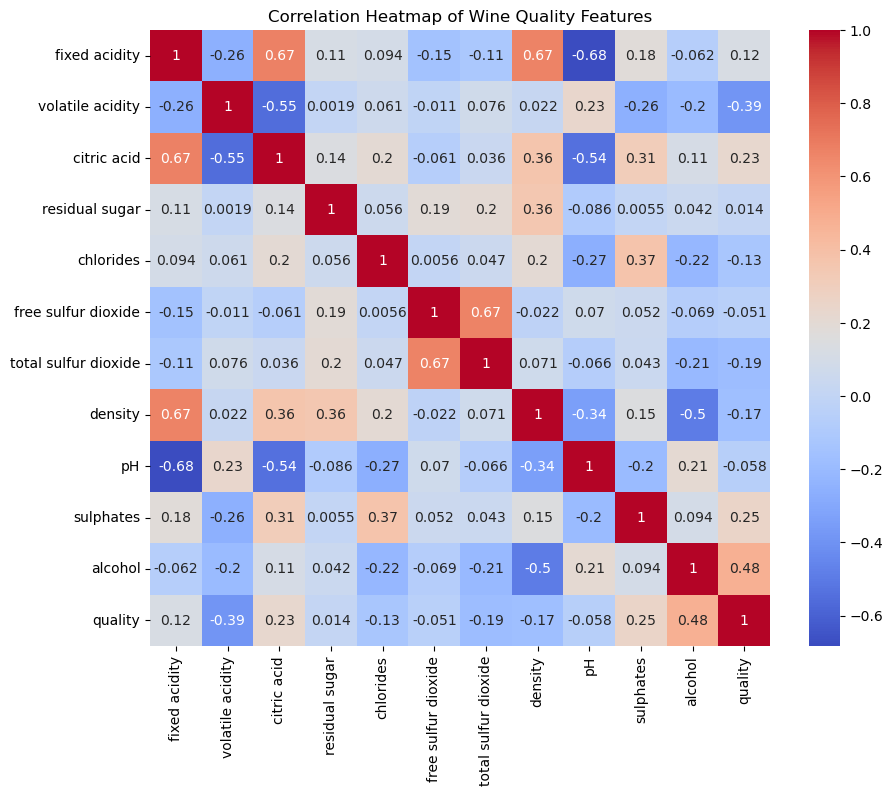

In [6]:
# Create a correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()

## Identify Top 5 Correlated Features

In [25]:
# Calculate absolute correlation values with the target and sort them
target_correlation = correlation_matrix['quality'].abs().sort_values(ascending=False)
print(target_correlation[1:6])  # exclude the first one as it is 'quality' itself

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64


## Data Preprocessing for Model

In [12]:
# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)  # mapping quality to binary values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Pipeline Creation and Grid Search

In [15]:
# Create a Pipeline with StandardScaler and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameters for GridSearchCV
param_grid = {'knn__n_neighbors': np.arange(1, 31)}

# Perform grid search
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best performing parameters:", grid.best_params_)

Best performing parameters: {'knn__n_neighbors': 1}


## Plot Mean Test Scores per K Value

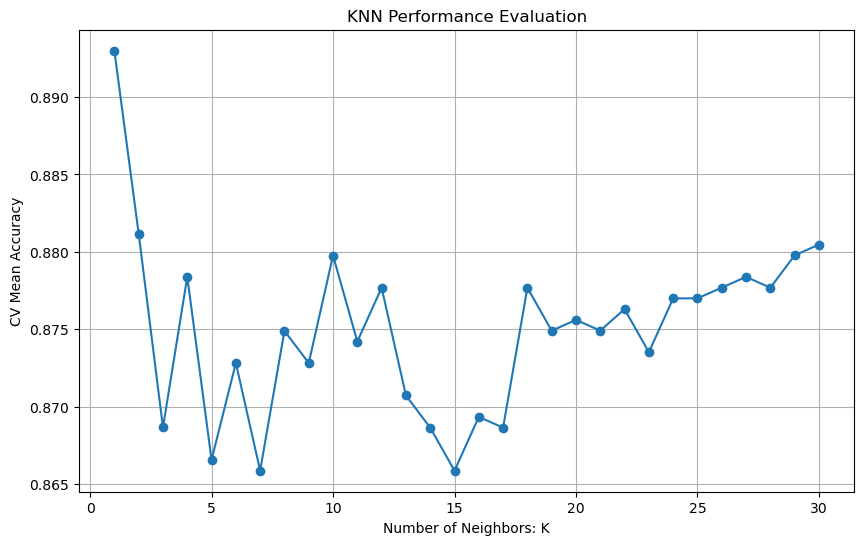

In [18]:
# Plotting the mean test scores per K value
mean_scores = grid.cv_results_['mean_test_score']
k_values = np.arange(1, 31)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('CV Mean Accuracy')
plt.title('KNN Performance Evaluation')
plt.grid(True)
plt.show()

## Final Model Evaluation

In [21]:
# Evaluate the model
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       138
           1       0.55      0.55      0.55        22

    accuracy                           0.88       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.88      0.88      0.88       160

Confusion Matrix:
[[128  10]
 [ 10  12]]
